시도별 의료인력 현황\
https://kosis.kr/statHtml/statHtml.do?orgId=350&tblId=TX_35003_A003&conn_path=I2

In [68]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import folium
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [69]:
시도별의료 = pd.read_csv('../../Data/public health/시도별 의료인력 현황.csv', encoding='euc-kr', index_col='시점')
시도별의료.head()

,시도별(1),합계,의사,의사.1,의사.2,의사.3,의사.4,치과의사,한의사,한의사.1,한의사.2,한의사.3,한의사.4,간호사,약사,물리치료사,작업치료사,사회복지사
시점,,,,,,,,,,,,,,,,,,
시점,시도별(1),소계,소계,일반의,인턴,레지던트,전문의,소계,소계,일반의,일반수련의,전문수련의,전문의,소계,소계,소계,소계,소계
2010,계,278789,78325,5217,2649,11737,58722,19678,14931,13049,223,371,1288,110677,29574,21245,2335,2024
2010,서울,73801,23077,934,1028,5013,16102,5933,3937,3317,76,152,392,28634,7667,3791,454,308
2010,부산,22037,6247,337,257,955,4698,1300,1134,1009,30,16,79,9268,2194,1512,200,182
2010,대구,15594,4597,138,214,875,3370,1055,840,769,5,14,52,6143,1679,1049,129,102


In [70]:
시도별의료.shape

(215, 18)

In [71]:
# column name 재정의, 불필요한 column, row 삭제
colnames =['시도별','합계','의사소계','의사 일반의','의사 인턴','의사 레지던트','의사 전문의','치과의사','한의사소계','한의사 일반의','한의사 일반수련의','한의사 전문수련의','한의사 수련의','간호사','약사','물리치료사','작업치료사','사회복지사']
시도별의료 = 시도별의료[2:]
시도별의료.columns = colnames
시도별의료 = 시도별의료[['시도별','의사 일반의','의사 인턴','의사 레지던트','의사 전문의','치과의사','한의사 일반의','한의사 일반수련의','한의사 전문수련의','한의사 수련의','간호사','약사','물리치료사','작업치료사','사회복지사']]

In [72]:
시도별의료.head()

,시도별,의사 일반의,의사 인턴,의사 레지던트,의사 전문의,치과의사,한의사 일반의,한의사 일반수련의,한의사 전문수련의,한의사 수련의,간호사,약사,물리치료사,작업치료사,사회복지사
시점,,,,,,,,,,,,,,,
2010,서울,934,1028,5013,16102,5933,3317,76,152,392,28634,7667,3791,454,308
2010,부산,337,257,955,4698,1300,1009,30,16,79,9268,2194,1512,200,182
2010,대구,138,214,875,3370,1055,769,5,14,52,6143,1679,1049,129,102
2010,인천,193,78,430,2511,874,571,3,-,32,4364,1356,1132,150,93
2010,광주,91,136,472,2024,783,324,19,2,48,4538,951,698,73,99


In [73]:
print(시도별의료['시도별'].unique())
print(len(시도별의료['시도별']))
print(len(시도별의료[시도별의료.index==2021]))
print(시도별의료.shape)

['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주' '계' '세종']
213
0
(213, 15)


In [74]:
# index 값 Int로 변환 
시도별의료.index = 시도별의료.index.astype(int)

In [75]:
# '-' 를 0으로 변환, values int로 변환
columns = 시도별의료.columns
columns[0]

for i in range(15):
    시도별의료[시도별의료.columns[i]][시도별의료[시도별의료.columns[i]] == '-'] = 0

for i in range(14): 
    시도별의료.iloc[:,i+1]=시도별의료.iloc[:,i+1].astype(int)

시도별의료.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 2010 to 2021
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   시도별        213 non-null    object
 1   의사 일반의     213 non-null    int64 
 2   의사 인턴      213 non-null    int64 
 3   의사 레지던트    213 non-null    int64 
 4   의사 전문의     213 non-null    int64 
 5   치과의사       213 non-null    int64 
 6   한의사 일반의    213 non-null    int64 
 7   한의사 일반수련의  213 non-null    int64 
 8   한의사 전문수련의  213 non-null    int64 
 9   한의사 수련의    213 non-null    int64 
 10  간호사        213 non-null    int64 
 11  약사         213 non-null    int64 
 12  물리치료사      213 non-null    int64 
 13  작업치료사      213 non-null    int64 
 14  사회복지사      213 non-null    int64 
dtypes: int64(14), object(1)
memory usage: 26.6+ KB


In [76]:
# 시도별의료.pivot_table("윤석열", index='광역시도', aggfunc=sum)

In [77]:
시도별의료[시도별의료['시도별']=='계']

,시도별,의사 일반의,의사 인턴,의사 레지던트,의사 전문의,치과의사,한의사 일반의,한의사 일반수련의,한의사 전문수련의,한의사 수련의,간호사,약사,물리치료사,작업치료사,사회복지사
시점,,,,,,,,,,,,,,,
2011,계,5646,2890,11547,64461,21410,14649,292,358,1527,118771,33643,24017,3094,2400
2012,계,4934,2745,11508,67574,21888,15120,253,389,1591,120491,32560,25475,3594,2642
2013,계,4899,2864,12338,70609,22482,15614,242,393,1950,134748,32537,27111,3966,2907
2014,계,4854,2734,12229,73110,22952,16108,187,374,2098,147210,32645,29326,4667,3056
2015,계,4790,2829,11907,75550,23540,16451,224,369,2202,158247,33206,31194,5133,3312
2016,계,5061,2766,11604,78282,24150,16850,244,341,2302,179989,33946,33345,5837,3506
2017,계,5246,2743,11211,81041,25300,17333,233,359,2464,185853,36980,35587,6258,3588
2018,계,5557,2777,10990,83147,25792,17570,290,354,2545,195314,37837,38015,6807,3800
2019,계,5870,2863,10773,86122,26486,18219,285,399,2727,215293,38941,41457,7465,4095


In [78]:
# 시도별의료[시도별의료.index==2021]
# 시도별의료[시도별의료.index==2021][1:]
시도별의료2021 = 시도별의료[시도별의료.index==2021][1:].sort_index(ascending=False)
시도별의료2021.set_index(keys=시도별의료2021['시도별'], inplace=True,drop=True)
시도별의료2021 = 시도별의료2021.iloc[:,1:]
시도별의료2021 = 시도별의료2021.sort_values(by='약사',ascending=False)

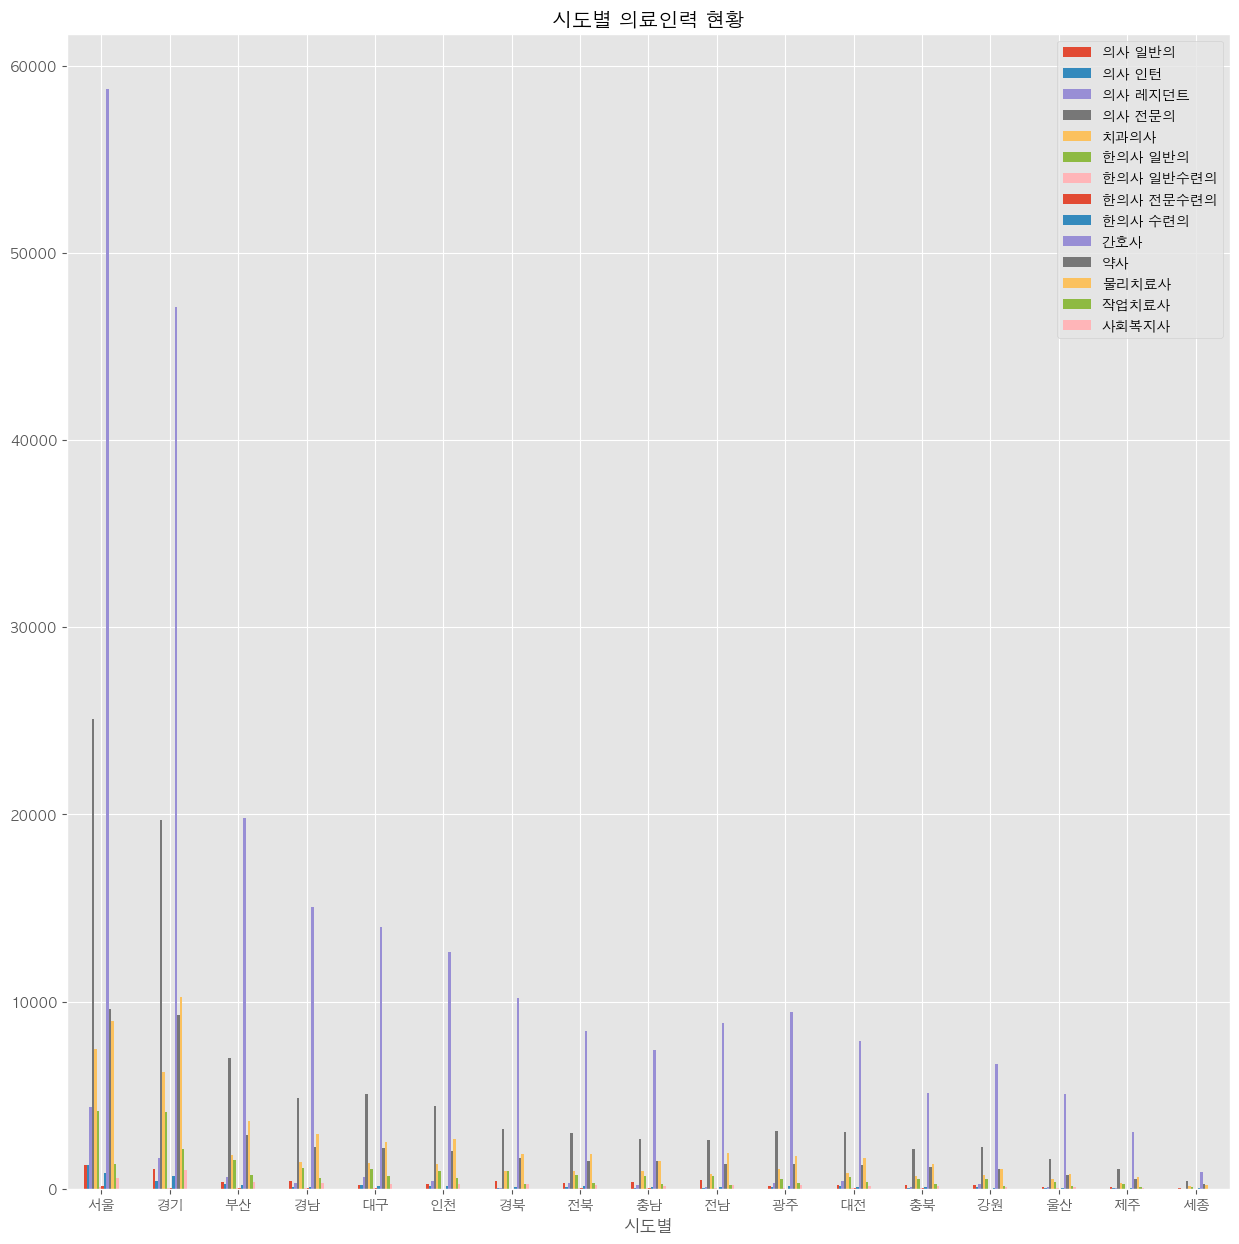

In [79]:
plt.style.use('ggplot')
시도별의료2021.plot(
    kind='bar', 
    figsize=(15,15),
    # color = terrain.colors,
    )

plt.xticks(rotation="horizontal",size=10) # vertical은 90도
# plt.ylabel("취업자수(단위:천명)", size=15)
plt.title('시도별 의료인력 현황')

plt.show()

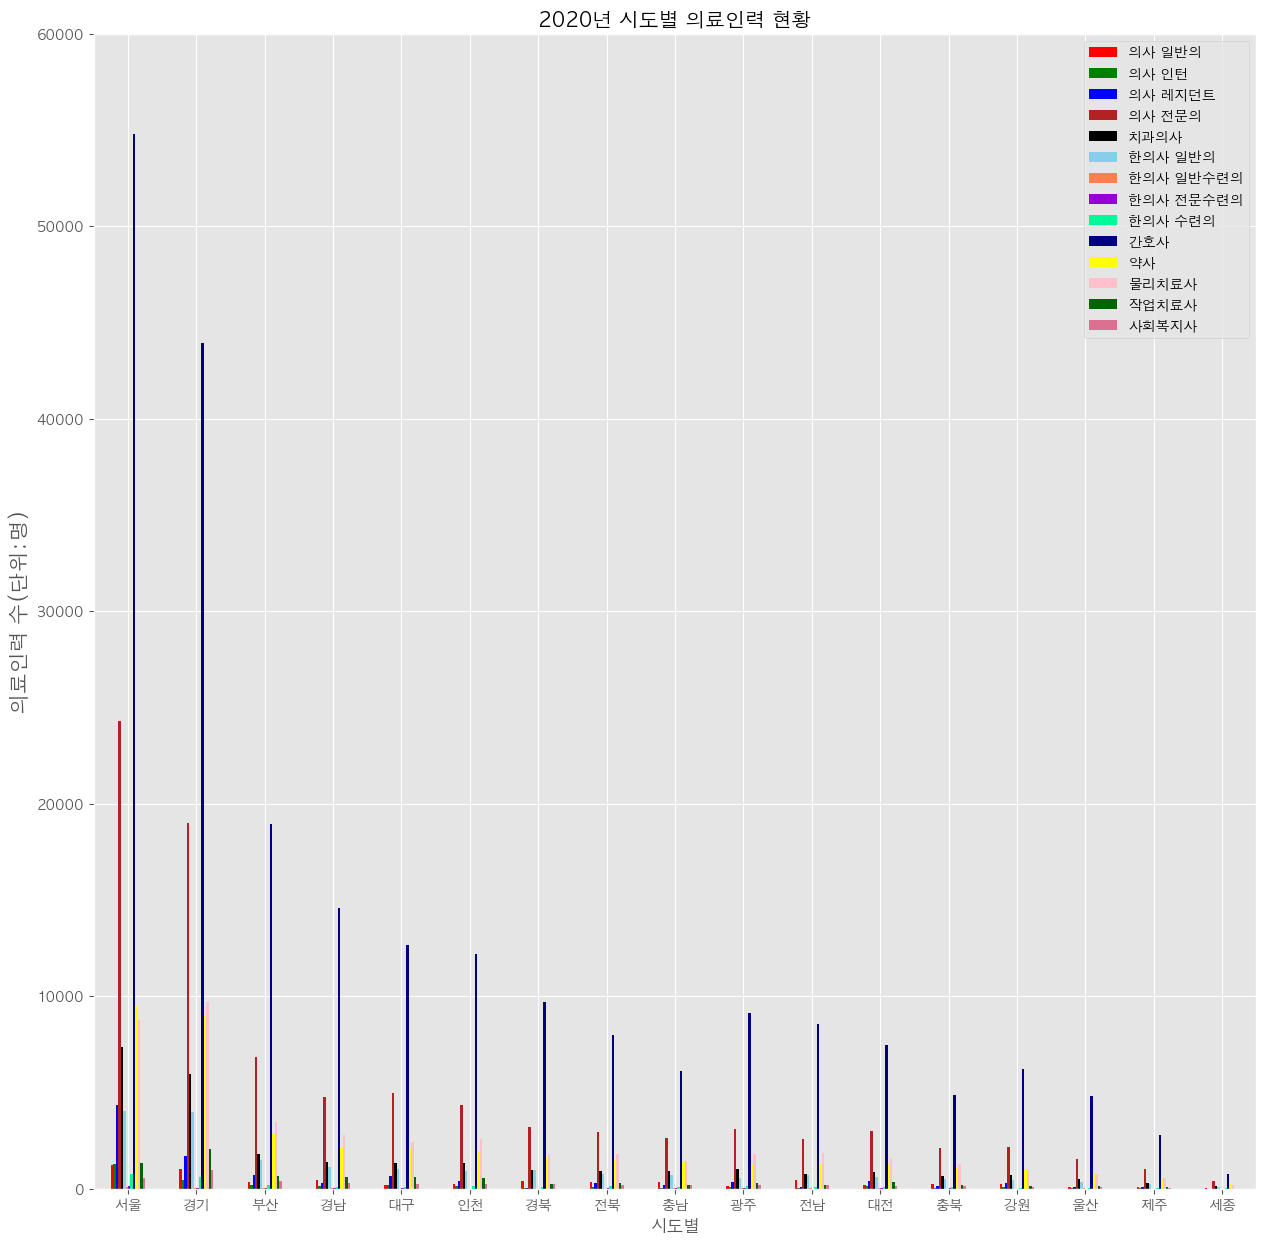

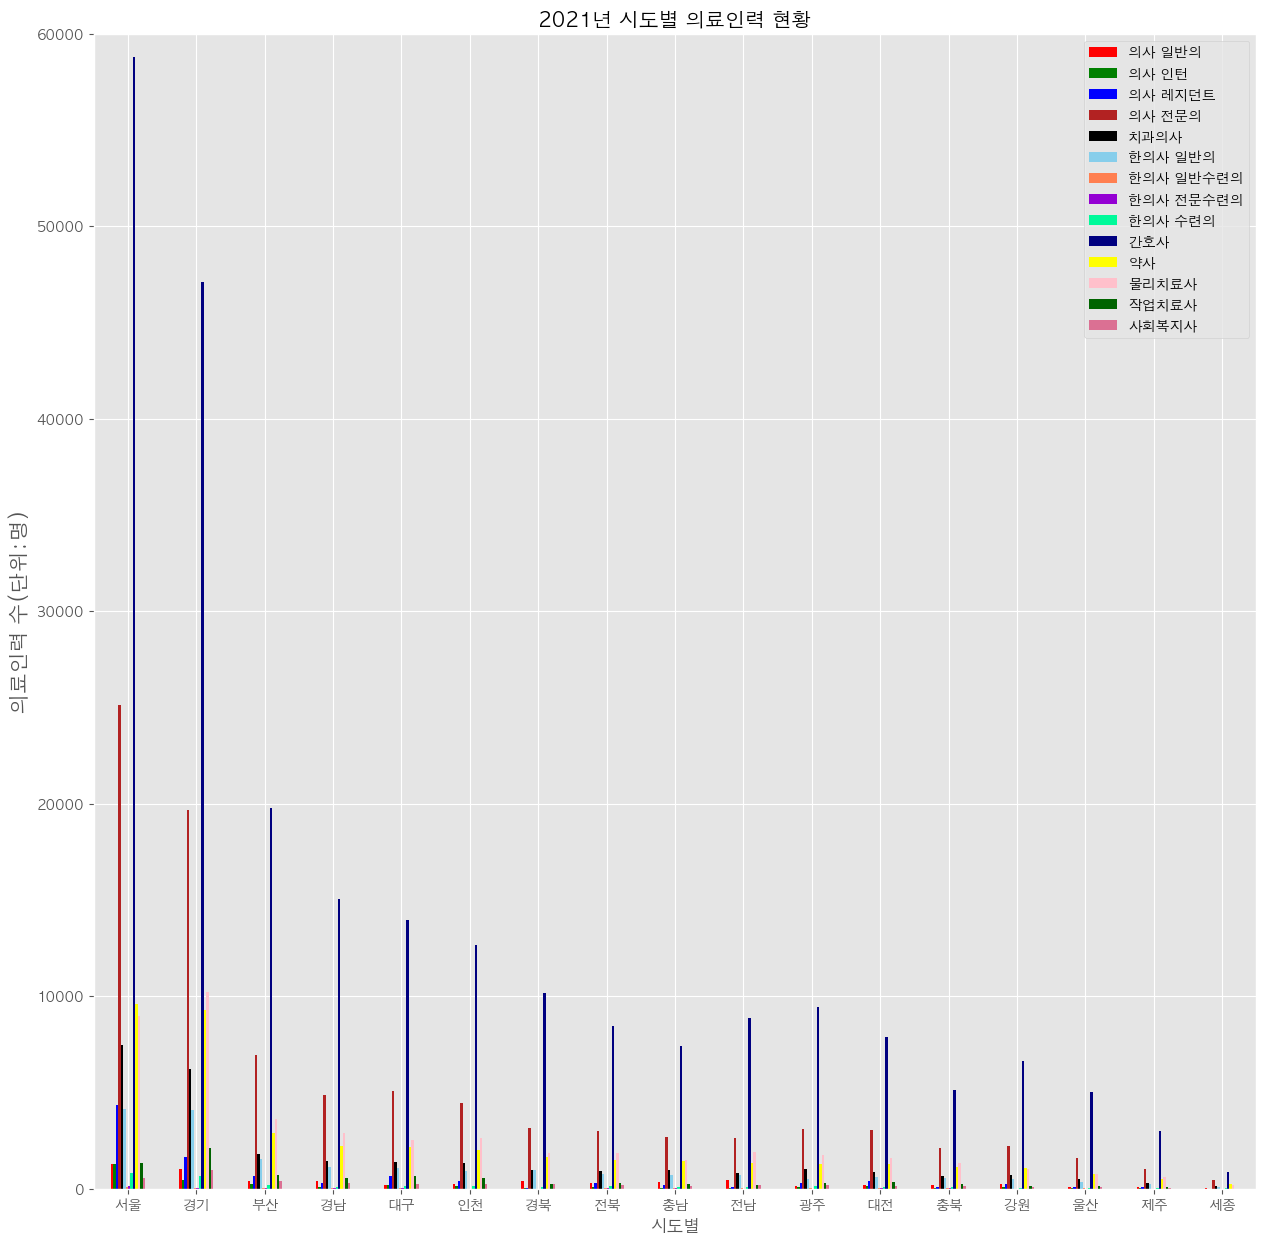

In [80]:
colors = ['red','green','blue','firebrick','black','skyblue','coral','darkviolet','mediumspringgreen','navy','yellow','pink','darkgreen','palevioletred']
years = [y for y in range(2020,2022)]
# years = [y for y in range(2011,2022)]
for year in years:
    titleYear = year
    year = 시도별의료[시도별의료.index==year][1:].sort_index(ascending=False)
    year.set_index(keys=year['시도별'], inplace=True,drop=True)
    year = year.iloc[:,1:]
    year = year.sort_values(by='약사',ascending=False)
    plt.style.use('ggplot')
    year.plot(
        kind='bar', 
        figsize=(15,15),
        color = colors,
        )
    plt.xticks(rotation="horizontal",size=10) # vertical은 90도
    plt.ylabel("의료인력 수(단위:명)", size=15)
    plt.title('%d년 시도별 의료인력 현황' %titleYear)
    plt.ylim(0,60000)
    plt.show()


In [82]:
시도별의료

,시도별,의사 일반의,의사 인턴,의사 레지던트,의사 전문의,치과의사,한의사 일반의,한의사 일반수련의,한의사 전문수련의,한의사 수련의,간호사,약사,물리치료사,작업치료사,사회복지사
시점,,,,,,,,,,,,,,,
2010,서울,934,1028,5013,16102,5933,3317,76,152,392,28634,7667,3791,454,308
2010,부산,337,257,955,4698,1300,1009,30,16,79,9268,2194,1512,200,182
2010,대구,138,214,875,3370,1055,769,5,14,52,6143,1679,1049,129,102
2010,인천,193,78,430,2511,874,571,3,0,32,4364,1356,1132,150,93
2010,광주,91,136,472,2024,783,324,19,2,48,4538,951,698,73,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,전북,311,93,282,2994,940,757,13,26,144,8434,1485,1832,323,200
2021,전남,465,30,88,2616,803,706,13,4,91,8880,1336,1928,192,216
2021,경북,404,14,42,3167,966,959,8,10,66,10179,1640,1872,256,257


의사 = 의사 일반의, 의사 인턴, 의사 레지던트, 의사전문의\
치과의사 = 치과의사\
한의사 = 한의사 일반의, 한의사 일반수련의, 한의사 전문수련의, 한의사 수련의\
간호사 = 간호사\
약사 = 약사\
기타 보건의료인 = 물리치료사 + 작업치료사 + 사회복지사

In [83]:
시도별의료['의사'] = 시도별의료['의사 일반의']+시도별의료['의사 인턴']+시도별의료['의사 레지던트']+시도별의료['의사 전문의']
시도별의료['한의사'] = 시도별의료['한의사 일반의']+시도별의료['한의사 일반수련의']+시도별의료['한의사 전문수련의']+시도별의료['한의사 수련의']
시도별의료['기타보건의료인'] = 시도별의료['물리치료사']+시도별의료['작업치료사']+시도별의료['사회복지사']
finalHealth = 시도별의료[['시도별','의사','치과의사','한의사','약사','간호사','기타보건의료인']]

In [84]:
finalHealth.to_csv('../../Data/public health/hosik_의료인_2010_2021.csv', encoding='utf-8', index=True)